#                    IMAGE CLASSIFICATION ON CIAR-10 DATASET

# Module-1

# Loading dataset 

In [1]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np

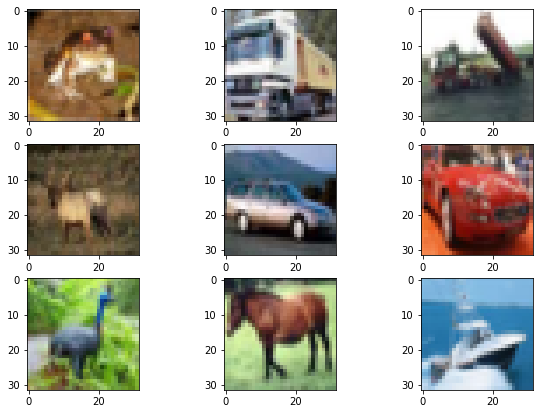

In [46]:
(x_train, y_train), (x_test, y_test1) = cifar10.load_data()
from matplotlib import pyplot
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(x_train[i])
pyplot.show()

# Module-2

# Data augmentation

In [3]:
#data augmentation
datagen = ImageDataGenerator(
    zoom_range = 0.5, 
    vertical_flip=True,
    rotation_range=50,
    width_shift_range=0,
    height_shift_range=0,
    horizontal_flip=False,
    )
datagen.fit(x_train)

# Module-3

# Normalization

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [47]:
#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)
 
num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test1,num_classes)

# Module-4

# CNN model

# 1. Building model

In [13]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 15:
        lrate = 0.0005
    if epoch > 20:
        lrate = 0.0003
    return lrate

In [14]:
weight_decay = 1e-3
model = Sequential()
model.add(Conv2D(32, (3,3), padding='valid', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='valid', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))
 
model.add(Conv2D(64, (3,3), padding='valid', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='valid', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
 
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
activation_14 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_15 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)       

# 2. Training the model

In [20]:
 batch_size = 256

    
adam = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
hist = model.fit_generator(datagen.flow
                    (x_train, y_train, batch_size=batch_size),
                    #steps_per_epoch=x_train.shape[0],
                    epochs=25,
                    verbose=1,validation_data=(x_test,y_test),
                    callbacks=[LearningRateScheduler(lr_schedule)])

Epoch 1/25
196/196 [==============================] - 372s 2s/step - loss: 2.4151 - accuracy: 0.2639 - val_loss: 1.8050 - val_accuracy: 0.3604
Epoch 2/25
196/196 [==============================] - 371s 2s/step - loss: 1.9476 - accuracy: 0.3500 - val_loss: 1.7182 - val_accuracy: 0.4185
Epoch 3/25
196/196 [==============================] - 329s 2s/step - loss: 1.7417 - accuracy: 0.4034 - val_loss: 1.6483 - val_accuracy: 0.4485
Epoch 4/25
196/196 [==============================] - 312s 2s/step - loss: 1.6387 - accuracy: 0.4394 - val_loss: 1.5016 - val_accuracy: 0.4812
Epoch 5/25
196/196 [==============================] - 319s 2s/step - loss: 1.5465 - accuracy: 0.4718 - val_loss: 1.5077 - val_accuracy: 0.4943
Epoch 6/25
196/196 [==============================] - 321s 2s/step - loss: 1.4873 - accuracy: 0.4899 - val_loss: 1.3240 - val_accuracy: 0.5543
Epoch 7/25
196/196 [==============================] - 318s 2s/step - loss: 1.4251 - accuracy: 0.5089 - val_loss: 1.3185 - val_accuracy: 0.5638

# 3. Performance metrics

In [21]:
#testing
_,acc=model.evaluate(x_test,y_test)
print("Accuracy:")
print(acc*100)

313/313 [==============================] - 12s 40ms/step - loss: 0.9729 - accuracy: 0.6849
Accuracy:
68.48999857902527


In [22]:
from matplotlib import pyplot as plt

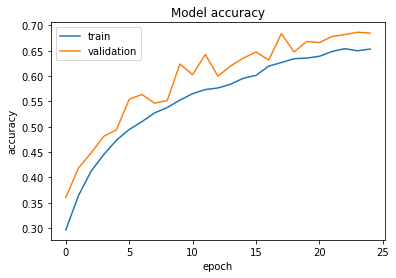

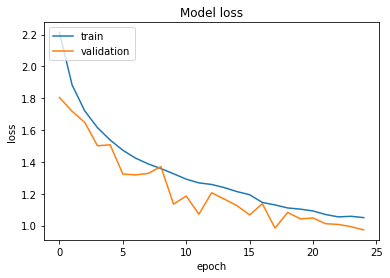

In [25]:
#  "Accuracy"

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Module-5

# Prediction

# 1. Predict and display using console

In [ ]:
model.save("model1_cifar_25epoch.h5") 

In [ ]:
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}

In [2]:
from PIL import Image
import numpy as np
im=Image.open("aeroplane DL test 1.jpg")
# the input image is required to be in the shape of dataset, i.e (32,32,3)
 
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(pred,results[pred])

0 aeroplane


In [55]:
pred = model.predict(x_test).argmax(axis=1)
pred[:10]


array([3, 8, 8, 8, 6, 6, 1, 6, 6, 1], dtype=int64)

In [56]:
y_test1[:10]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3],
       [1]], dtype=uint8)

# 2. Predict and display using GUI

In [ ]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
from keras.models import load_model
model = load_model('model1_cifar_25epoch.h5')
classes = { 
    0:'aeroplane',
    1:'automobile',
    2:'bird',
    3:'cat',
    4:'deer',
    5:'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck' 
}
top=tk.Tk()
top.geometry('800x600')
top.title('Image Classification CIFAR10')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((32,32))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict_classes([image])[0]
    sign = classes[pred]
    print(sign)
    label.configure(foreground='#011638', text=sign) 
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",
   command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',
font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),
    (top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text="Upload an image",command=upload_image,
  padx=10,pady=5)

upload.configure(background='#364156', foreground='white',
    font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Image Classification CIFAR10",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()